In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('/kaggle/input/rental-property/dataset_20_Rental Property Listings.csv')
df.head()

,Date,Product,Region,Customer_Type,Quantity,Price,Discount,Revenue
0,2024-12-02,Apartment,Suburban,Tenant,6,1483.55,0.05,8456.23
1,2024-10-10,Condo,Suburban,Landlord,7,2288.55,0.13,13937.27
2,2024-08-10,House,Suburban,Tenant,7,971.61,0.21,5373.00
3,2024-09-04,House,Urban,Tenant,3,1858.58,0.19,4516.35
4,2024-01-08,Apartment,Urban,Landlord,6,2468.80,0.22,11553.98


In [4]:
df.info()
df.describe()
df.isnull().sum()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


Index(['Date', 'Product', 'Region', 'Customer_Type', 'Quantity', 'Price',
       'Discount', 'Revenue'],
      dtype='object')

In [5]:
    df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)
print("After Cleaning:")
print(df.info())

After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB
None


In [6]:
most_ordered_items = df['Product'].value_counts()
print("Most Ordered Items:\n", most_ordered_items.head())

revenue_by_product = df.groupby('Product')['Revenue'].sum()
print("Revenue by Product:\n", revenue_by_product)

df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format
orders_over_time = df.groupby(df['Date'].dt.date).size()
print("Orders Over Time:\n", orders_over_time)

Most Ordered Items:
 Product
Condo        366
House        328
Apartment    306
Name: count, dtype: int64
Revenue by Product:
 Product
Apartment    2495065.11
Condo        2815559.70
House        2647848.38
Name: Revenue, dtype: float64
Orders Over Time:
 Date
2024-01-01    8
2024-01-02    1
2024-01-03    6
2024-01-04    2
2024-01-05    6
             ..
2024-12-26    3
2024-12-27    1
2024-12-28    4
2024-12-30    2
2024-12-31    3
Length: 347, dtype: int64


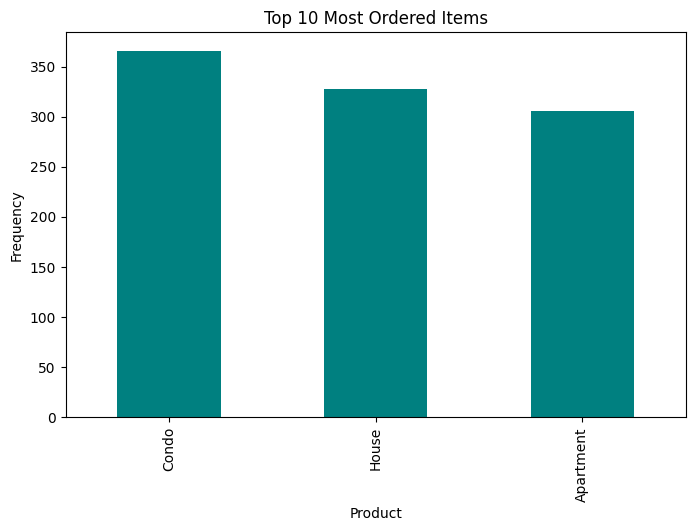

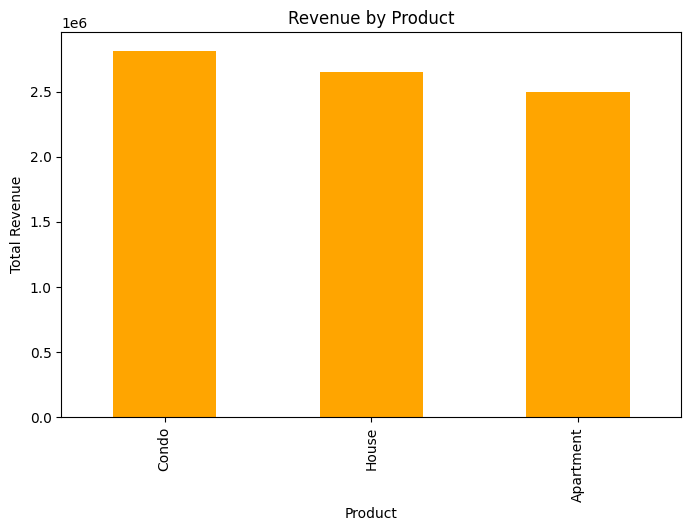

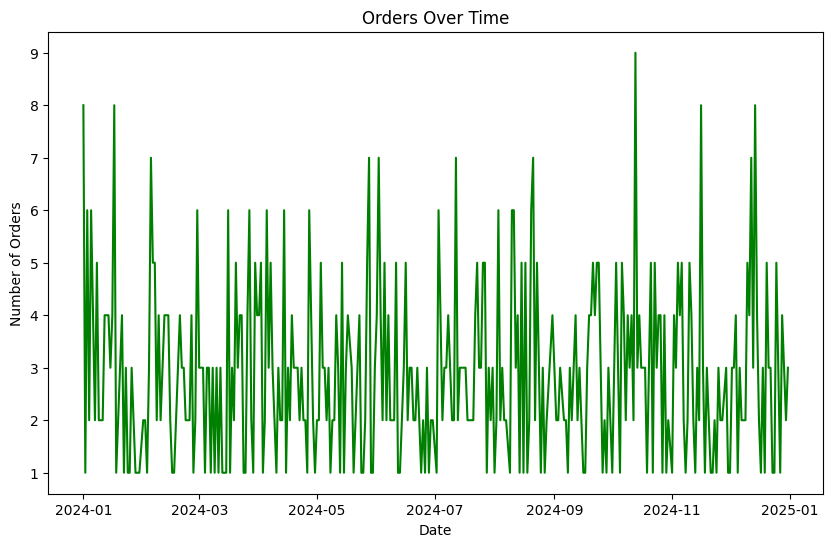

In [7]:
most_ordered_items.head(10).plot(kind='bar', figsize=(8, 5), color='teal')
plt.title("Top 10 Most Ordered Items")
plt.xlabel("Product")
plt.ylabel("Frequency")
plt.show()


revenue_by_product = df.groupby('Product')['Revenue'].sum()
revenue_by_product.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(8, 5), color='orange')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.show()


orders_over_time.plot(figsize=(10, 6), color='green')
plt.title("Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.show()

In [8]:
print("Conclusions:")
print("- Most ordered products are likely the most popular or in demand.")
print("- Products generating the highest revenue could indicate profitable areas.")
print("- Trends in orders over time could help with demand forecasting and planning.")

Conclusions:
- Most ordered products are likely the most popular or in demand.
- Products generating the highest revenue could indicate profitable areas.
- Trends in orders over time could help with demand forecasting and planning.
